In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style="whitegrid")
sns.set_theme()

In [2]:
df = pd.read_csv('transcriptomics_fractions.csv')
df1 = pd.read_csv('samples_transcriptomics.csv', index_col='Unnamed: 0').set_index('Sample.ID')
df2 = pd.read_csv('Ecoli_gene_functional_annotations.csv', encoding = 'cp1252', index_col='Unnamed: 0')

In [3]:
df_renamed = df.rename(columns={'Unnamed: 0': 'gene'})
df_T = df_renamed.set_index('gene')
df2_sorted = df2.dropna(subset=['gene']).sort_values(by='gene', ascending=True).reset_index(drop=True)
df2_s = df2_sorted.set_index('gene')

In [4]:
df_join = pd.merge(df2_s, df_T, left_index=True, right_index=True)

In [5]:
Alim = df_join.loc[:,:'a4_1'].sort_values(by='top_cog_functional_cat', ascending=True)
Clim = df_join.drop(df_join.columns[list(range(7,14)) + list(range(24, 35))], axis=1).sort_values(by='top_cog_functional_cat', ascending=True)
Rlim = df_join.drop(df_join.columns[7:24], axis=1).sort_values(by='top_cog_functional_cat', ascending=True)

In [6]:
def ffunctionality(group, functionality, a ,b):
    'a, b =  0, 7 for Alim'
    'a, b =  7, 17 for Clim'
    'a, b =  17, 28 for Rlim'
    func = group['top_cog_functional_cat'].tolist()
    for raw in enumerate(func):
        group_func = group[group['top_cog_functional_cat']==str(functionality)]
        group_f= group_func.iloc[:,7:].T
        #group_f['Growth.rate']= list(df1['Growth.rate..1.h.'][a:b])
        group_f['Gene.sum'] = group_f.sum(axis=1)
        group_ff = group_f['Gene.sum']
    return pd.merge(df1[a:b][:], group_ff, left_index=True, right_index=True)

In [7]:
def Tcog_func(G_name, group, a, b):
    func = list(dict.fromkeys(Alim['top_cog_functional_cat'].tolist()))
    df_dict = {}
    for i in func:
        df_result = ffunctionality(group, i, a, b)
        df_dict[f"{G_name}_{i}"] = df_result
        #print(f"{G_name}_{i}")
    return df_dict

In [8]:
ATcog_func_by_functionality = Tcog_func("Alim", Alim, 0, 7)

In [10]:
CTcog_func_by_functionality = Tcog_func("Clim", Clim, 7, 17)

In [11]:
RTcog_func_by_functionality = Tcog_func("Rlim", Rlim, 17, 28)

In [71]:
def plot_group(group_cog):
    key_dic = list(group_cog.keys()) 
    palette = sns.color_palette("Set1", len(key_dic))
    fig, ax = plt.subplots(figsize=(16, 8))
    for idx, key in enumerate(key_dic):
        color = palette[idx]
        sns.regplot(x=group_cog[key]['Growth.rate..1.h.'], 
                    y=group_cog[key]['Gene.sum'], 
                    ax=ax, 
                    marker='o', 
                    label=str(key[-1][0]), 
                    scatter_kws={'s': 50, 'color': color},  
                    line_kws={'color': color}, 
                    ci=None)  
    ax.set_xlabel('Lambda')
    ax.set_ylabel('Concentration')
    ax.set_title('Group ' + str(key_dic[0]).split('_')[0])
    ax.legend(title="Functionality")
    plt.tight_layout()
    
    return plt.show()

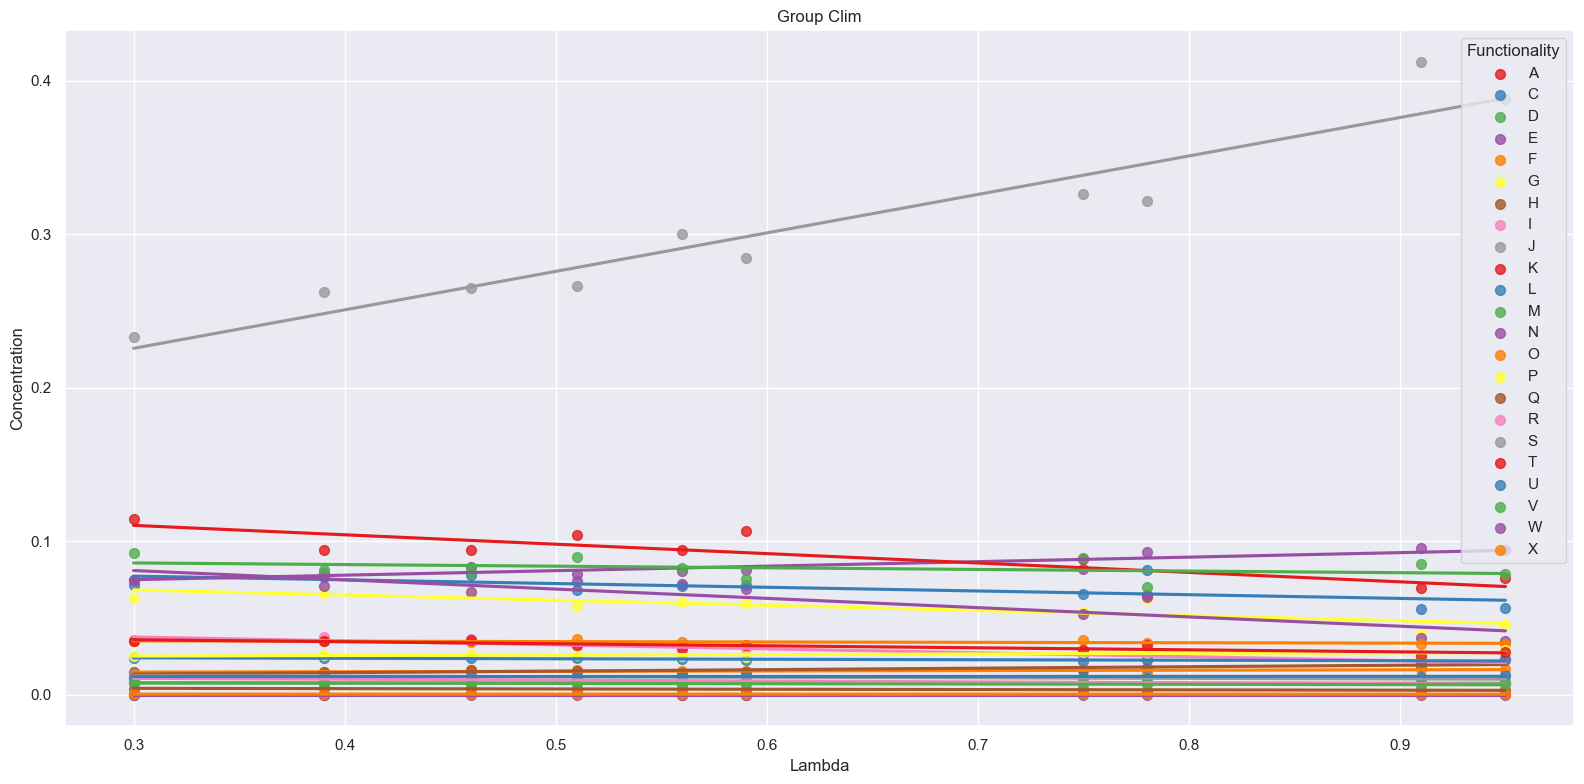

In [72]:
plot_group(CTcog_func_by_functionality)

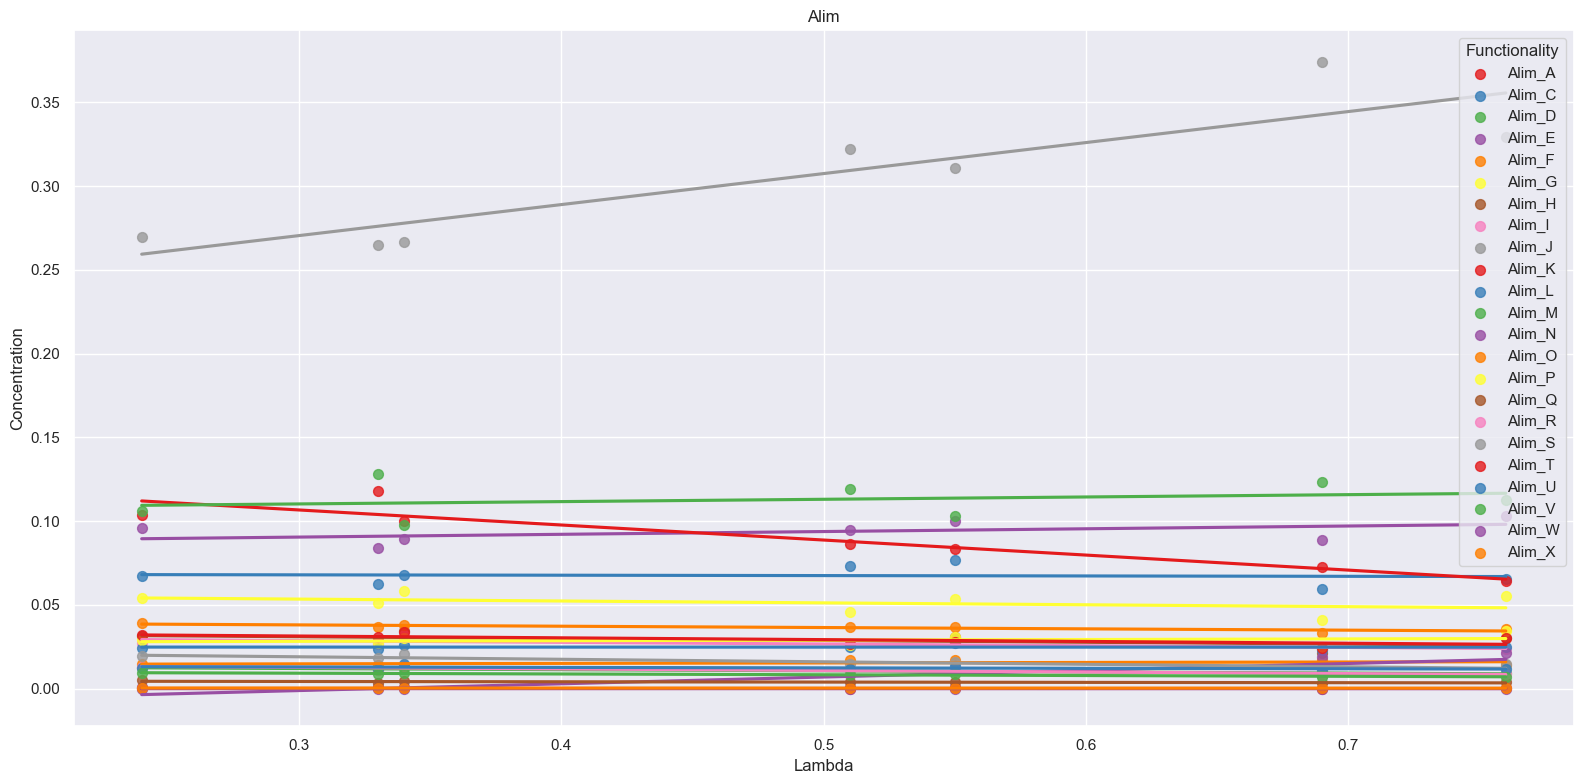

In [45]:
Alim_dic = list(ATcog_func_by_functionality.keys())  # List of groups

# Create a color palette for each group
palette = sns.color_palette("Set1", len(Alim_dic))  # Using "Set1" palette, you can change it

# Create a single figure and axis
fig, ax = plt.subplots(figsize=(16, 8))

# Loop through each group and plot the scatter points and regression line with the same color
for idx, key in enumerate(Alim_dic):
    color = palette[idx]  # Get the color for the current group
    sns.regplot(x=ATcog_func_by_functionality[key]['Growth.rate..1.h.'], 
                y=ATcog_func_by_functionality[key]['Gene.sum'], 
                ax=ax, 
                marker='o', 
                label=str(key), 
                scatter_kws={'s': 50, 'color': color},  # Set color for scatter points
                line_kws={'color': color},  # Set color for the regression line
                ci=None)  # No confidence interval shading

# Labels and title
ax.set_xlabel('Lambda')
ax.set_ylabel('Concentration')
ax.set_title('Alim')

# Show legend
ax.legend(title="Functionality")

# Adjust layout and display plot
plt.tight_layout()
plt.show()


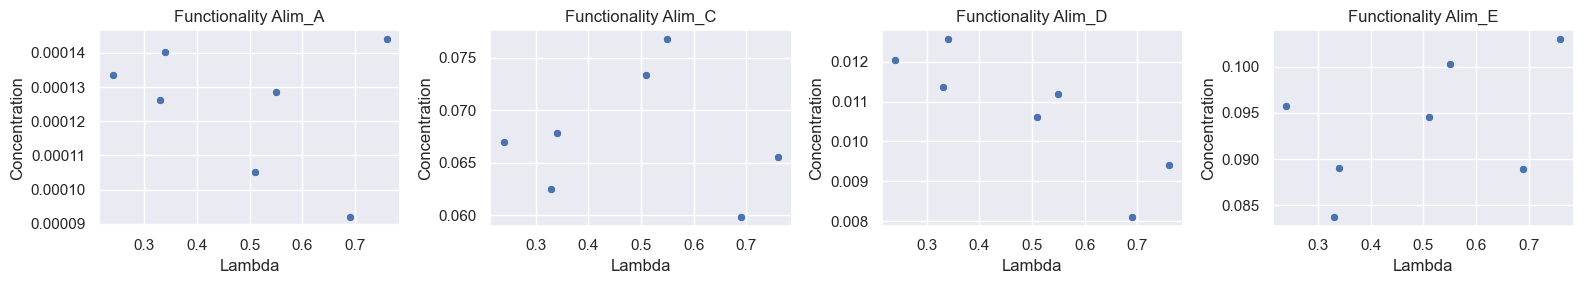

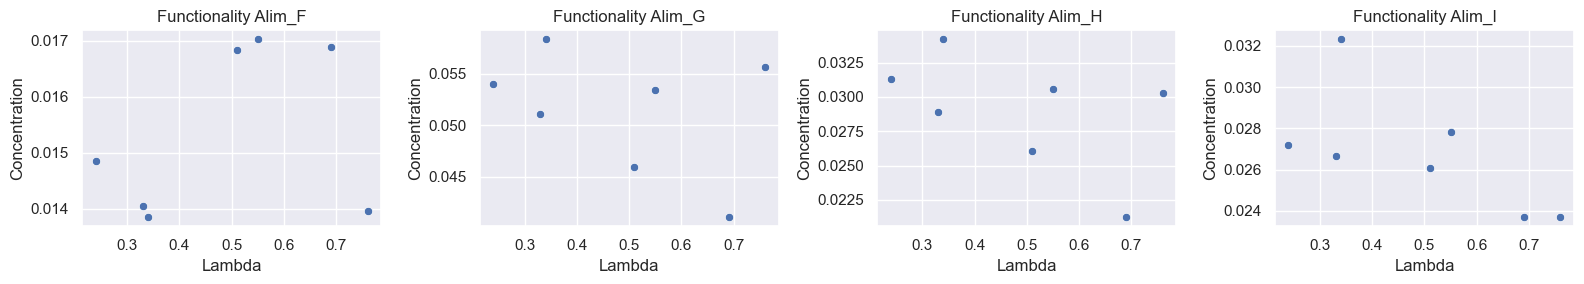

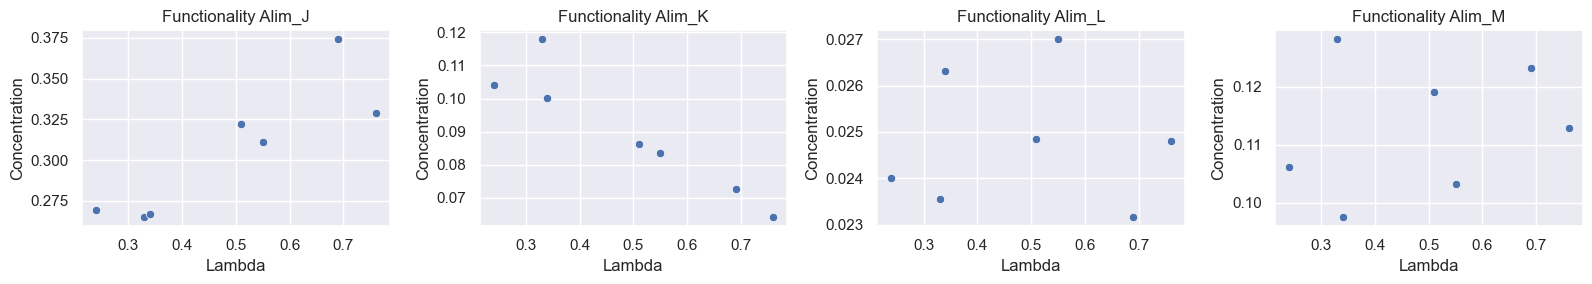

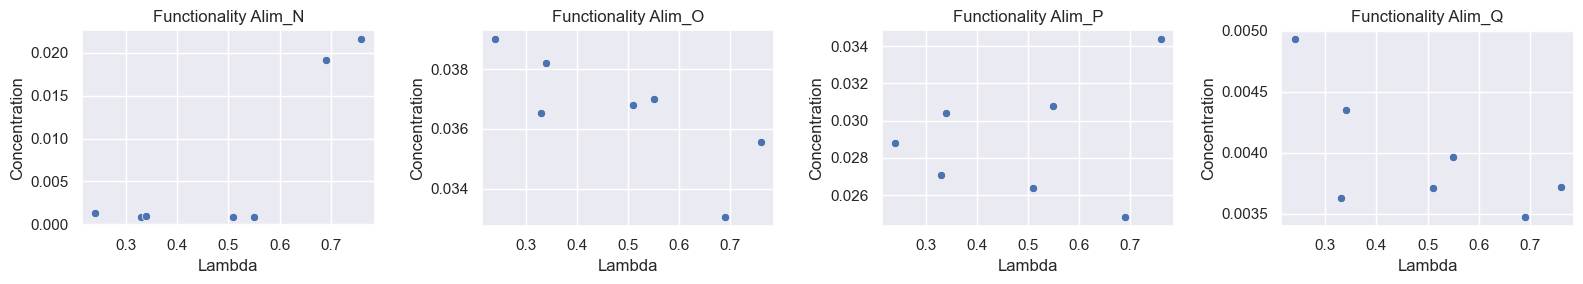

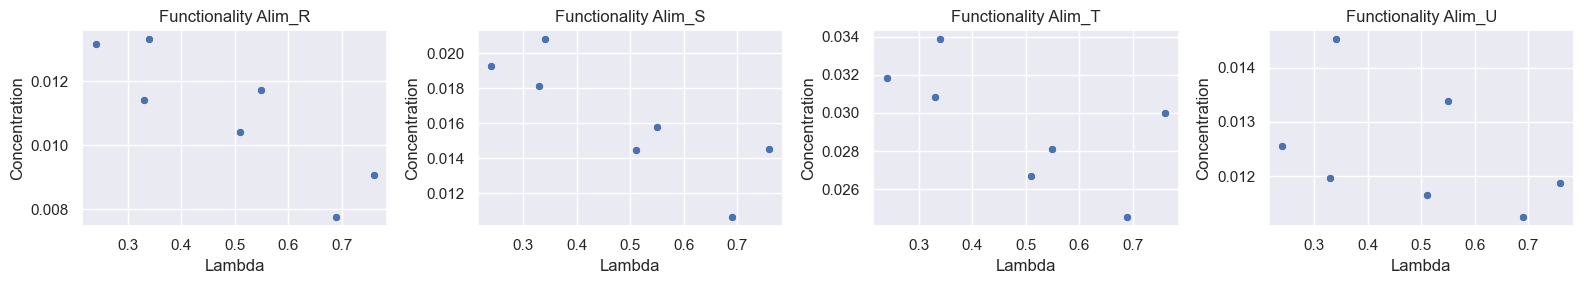

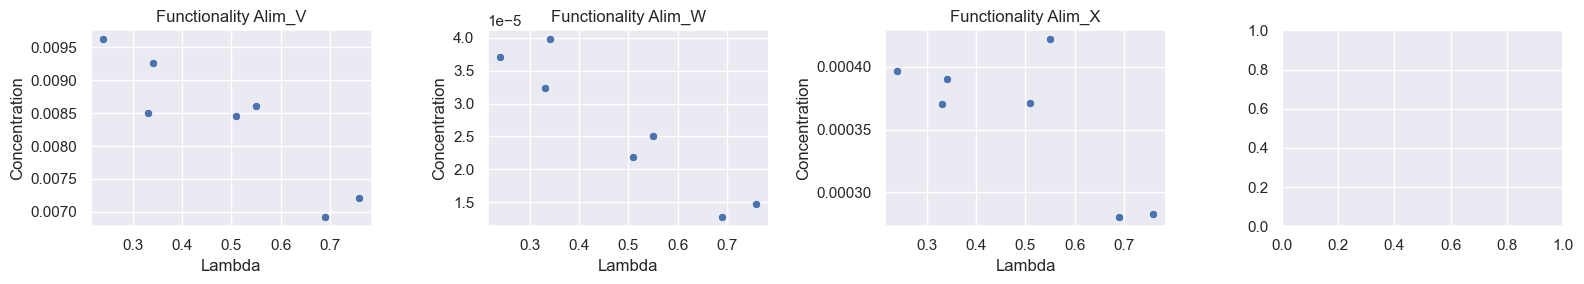

In [39]:
cols_per_figure = 4 

Alim_dic = list(ATcog_func_by_functionality.keys())  # Define before loop

for i in range(0, len(Alim_dic), cols_per_figure):  # Start at 0
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 3))
    axes = axes.flatten()  

    for idx, key in enumerate(Alim_dic[i:i+cols_per_figure]):  # Process 4 at a time
        ax = axes[idx]  # Use idx as integer index
        sns.scatterplot(x=ATcog_func_by_functionality[key]['Growth.rate..1.h.'], 
                        y=ATcog_func_by_functionality[key]['Gene.sum'], 
                        ax=ax, marker='o', color='b')  # Scatter plot (points only)
        ax.set_xlabel('Lambda')
        ax.set_ylabel('Concentration')
        ax.set_title('Functionality ' + str(key))

    plt.tight_layout()
    plt.show()

In [ ]:
cols_per_figure = 4 

for i in range(1, len(Alim_dic), cols_per_figure):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 3))
    axes = axes.flatten()  
    
    for j, col in enumerate(ATcog_func_by_functionality.columns[i:i+cols_per_figure]):
        ax = axes[j]
        sns.lineplot(x=ATcog_func_by_functionality['Growth.rate'], y=ATcog_func_by_functionality[col], ax=ax, marker='o')
        ax.set_title(f'{col}')
        ax.set_xlabel('Lambda')
        ax.set_ylabel('Conc.')
    
    plt.tight_layout()
    plt.show()

In [25]:
ATcog_func_by_functionality.shape[1]

AttributeError: 'dict' object has no attribute 'shape'

In [13]:
df_join

,locus,protein_len,gene.length..nt.,cog_functional_cat,cog_name,top_cog_functional_cat,functional_category_desc,a1,a1_1,a2,...,r0_1,r1,r1_1,r2,r2_1,r3,r3_1,r4,r4_1,r5
gene,,,,,,,,,,,,,,,,,,,,,
aaeA,b3241,310,933.0,V,Multidrug resistance efflux pump EmrA,V,Defense mechanisms,0.000004,0.000004,0.000006,...,0.000003,0.000004,0.000003,0.000005,0.000005,0.000004,0.000005,0.000005,0.000006,0.000005
aaeB,b3240,655,1968.0,S,Uncharacterized membrane protein YccC,S,Function unknown,0.000003,0.000003,0.000005,...,0.000003,0.000004,0.000004,0.000004,0.000005,0.000005,0.000006,0.000005,0.000006,0.000005
aaeR,b3243,309,930.0,K,"DNA-binding transcriptional regulator, LysR fa...",K,Transcription,0.000034,0.000047,0.000040,...,0.000028,0.000032,0.000027,0.000032,0.000027,0.000028,0.000025,0.000031,0.000028,0.000032
aas,b2836,719,2160.0,I,O-succinylbenzoic acid-CoA ligase MenE or rela...,I,Lipid transport and metabolism,0.000037,0.000029,0.000051,...,0.000035,0.000027,0.000025,0.000024,0.000025,0.000026,0.000025,0.000024,0.000022,0.000023
aas,b2836,719,2160.0,I,1-acyl-sn-glycerol-3-phosphate acyltransferase,I,Lipid transport and metabolism,0.000037,0.000029,0.000051,...,0.000035,0.000027,0.000025,0.000024,0.000025,0.000026,0.000025,0.000024,0.000022,0.000023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zraR,b4004,441,1326.0,T,DNA-binding transcriptional response regulator...,T,Signal transduction mechanisms,0.000006,0.000006,0.000006,...,0.000007,0.000008,0.000008,0.000008,0.000008,0.000008,0.000010,0.000009,0.000009,0.000008
zraS,b4003,465,1398.0,T,Signal transduction histidine kinase,T,Signal transduction mechanisms,0.000003,0.000005,0.000004,...,0.000005,0.000004,0.000003,0.000003,0.000003,0.000003,0.000004,0.000003,0.000004,0.000003
zupT,b3040,257,774.0,P,Zinc transporter ZupT,P,Inorganic ion transport and metabolism,0.000065,0.000123,0.000109,...,0.000095,0.000068,0.000056,0.000045,0.000052,0.000048,0.000053,0.000053,0.000050,0.000045


In [ ]:
Tcog_func_by_functionality = Tcog_func("Alim", Alim, 0, 7)
for key, df in Tcog_func_by_functionality.items():
    print(f"{key}:\n", df)

In [ ]:
Tcog_func_by_functionality.items()

In [ ]:
AlimA = ffunctionality(Alim, 'C', 0 , 7)
AlimA

In [ ]:
AlimC = ffunctionality(Alim, 'C', 0 , 7)

In [ ]:
AlimCE = ffunctionality(Alim, 'D', 0 , 7)

In [ ]:
plt.figure(figsize=(8, 5))

for col in AlimCE.columns[9:-1]: 
    sns.lineplot(x=AlimCE['Growth.rate'], y=AlimCE[col], label=col, marker='o')

plt.xlabel('Lambda')
plt.ylabel('Conc')
plt.title('Functionality CE')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
def sepffuncionality(group, functionality, a, b):
    func = group['cog_functional_cat'].tolist()
    for i in func:
        a = ffunctionality(group, functionality, a ,b)

In [ ]:
func

In [ ]:
func = list(dict.fromkeys(Alim['cog_functional_cat'].tolist()))
for i in func:
    Alim1 = str('Alim') + str(i) 
    A = ffunctionality(Alim, i, 0, 7)
    print(Alim1)
    print(A)

In [ ]:
func = list(dict.fromkeys(Alim['cog_functional_cat'].tolist()))

In [ ]:
cols_per_figure = 4 

for i in range(1, Alim.shape[1]-1, cols_per_figure):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 3))
    axes = axes.flatten()  
    
    for j, col in enumerate(Alim.columns[i:i+cols_per_figure]):
        ax = axes[j]
        sns.lineplot(x=Alim['Growth.rate'], y=Alim[col], ax=ax, marker='o')
        ax.set_title(f'{col}')
        ax.set_xlabel('Lambda')
        ax.set_ylabel('Conc.')
    
    plt.tight_layout()
    plt.show()

In [ ]:
cols_per_figure = 4
RlimC = ffunctionality(Rlim_sor, str(for i in func: print(i) , 17, 28)

for i in range(0, RlimC.shape[1]-1, cols_per_figure):
    fig, axes = plt.subplots(nrows=1, ncols=Alim_fA.shape[1]-1, figsize=(16, 3))
    axes = axes.flatten()  
    
    for j, col in enumerate(Alim_fa.columns[i:i+cols_per_figure]):
        ax = axes[j]
        sns.lineplot(x=Alim_fa['Growth.rate'], y=Alim_fa[col], ax=ax, marker='o')
        ax.set_title(f'Alim - A- {col}')
        #ax.set_xlabel('Lambda')
        ax.set_ylabel('Conc.')
    
    plt.tight_layout()
    plt.show()

In [ ]:
df1_plus_AlimFa = df1[:][:7].merge(Alim_fa, how='inner', on='Sample.ID')
df1_plus_AlimFa

In [ ]:
Alim_Sumplement60 = df1_plus_AlimFa[df1_plus_AlimFa['Supplement']=='60 µM IPTG']
Alim_Sumplement40 = df1_plus_AlimFa[df1_plus_AlimFa['Supplement']=='40 µM IPTG']
Alim_Sumplement28 = df1_plus_AlimFa[df1_plus_AlimFa['Supplement']=='28 µM IPTG']
Alim_Sumplement20 = df1_plus_AlimFa[df1_plus_AlimFa['Supplement']=='20 µM IPTG']

In [ ]:
sns.scatterplot(x = Alim_fa['Growth.rate'], y = Alim_fa['rtcA']+Alim_fa['orn'], marker='o')
#sns.lineplot(x = Alim_fa['Growth.rate'], y = Alim_fa['orn'], marker='o')
#sns.lineplot(Alim_Sumplement28['Growth.rate'], df['orn'], marker='o')
#sns.lineplot(Alim_Sumplement20['Growth.rate'], df['orn'], marker='o')
plt.xlabel('Lambda')
plt.ylabel('Conc')
plt.title(f'Alim - A-')
plt.legend()
plt.show()

In [ ]:
cols_per_figure = 2

for i in range(0, Alim_fA.shape[1]-1, cols_per_figure):
    fig, axes = plt.subplots(nrows=1, ncols=Alim_fA.shape[1]-1, figsize=(16, 3))
    axes = axes.flatten()  
    
    for j, col in enumerate(Alim_fa.columns[i:i+cols_per_figure]):
        ax = axes[j]
        sns.lineplot(x=Alim_fa['Growth.rate'], y=Alim_fa[col], ax=ax, marker='o')
        ax.set_title(f'Alim - A- {col}')
        #ax.set_xlabel('Lambda')
        ax.set_ylabel('Conc.')
    
    plt.tight_layout()
    plt.show()

In [ ]:
 Alim_fA.shape[1]

In [ ]:
import pandas as pd

# Crear un DataFrame de ejemplo con 20 columnas
data = {f'Col{i}': range(1, 6) for i in range(1, 21)}
df = pd.DataFrame(data)

# Eliminar columnas del 5 al 8 (índices 4 a 7) y del 14 al 20 (índices 13 a 19)
df_filtrado = df.drop(df.columns[list(range(4, 8)) + list(range(13, 19))], axis=1)

print(df_filtrado)